## Homework - Week 02 | Linear Regression

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

> ` The fuel_efficiency_mpg variable does not show a long tail. The histogram is roughly symmetric, the skewness is close to zero (-0.01), and while there are some outliers, the tails are not disproportionately stretched to one side. `


In [96]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# load dataset
df = pd.read_csv('data/car_fuel_efficiency.csv')

# set columns we will use
columns = ['engine_displacement',
            'horsepower',
            'vehicle_weight',
            'model_year',
            'fuel_efficiency_mpg']

# filter dataset
df_cars = df[columns]

# show first 5 rows of the dataframe
print(df_cars.head())

   engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369  


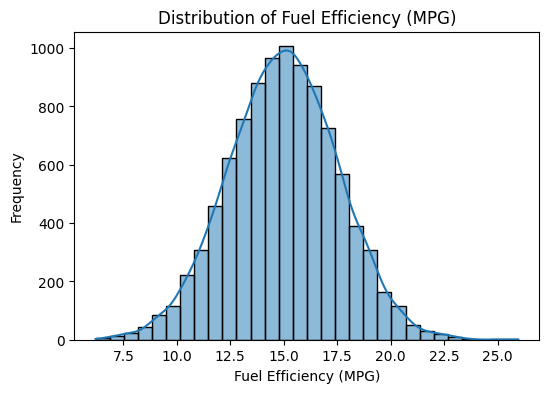

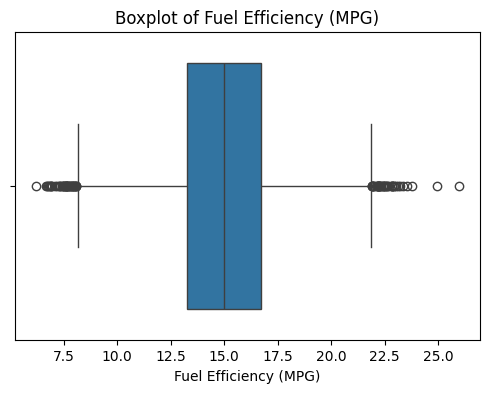

Kurtosis: 0.022732244497634557
Skewness: -0.012062219273507929


In [97]:
# plot `fuel_efficiency_mpg` to check distribution
plt.figure(figsize=(6, 4))
sns.histplot(df_cars['fuel_efficiency_mpg'], bins=30, kde=True)
plt.title('Distribution of Fuel Efficiency (MPG)')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.show()

# plot boxplot to check for outliers and tailness
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cars['fuel_efficiency_mpg'])
plt.title('Boxplot of Fuel Efficiency (MPG)')
plt.xlabel('Fuel Efficiency (MPG)')
plt.show()

# print kurtosis and skewness of `fuel_efficiency_mpg`
kurtosis = df_cars['fuel_efficiency_mpg'].kurtosis()
skewness = df_cars['fuel_efficiency_mpg'].skew()
print(f'Kurtosis: {kurtosis}')
print(f'Skewness: {skewness}')  

### Question 1

There's one column with missing values. What is it?


>  `'horsepower'`


In [98]:
# check for missing values
print(df_cars.isnull().sum())

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


### Question 2

What's the median (50% percentile) for variable `'horsepower'`?


> `149`


In [99]:
# median of 'horsepower'
median_horsepower = df_cars['horsepower'].median()
print(f'Median of horsepower: {median_horsepower}')

Median of horsepower: 149.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [100]:
# set the size of the sets

n = len(df_cars)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

# shuffle the data
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# split the data
df_train = df_cars.iloc[idx[:n_train]]
df_val = df_cars.iloc[idx[n_train:n_train + n_val]]
df_test = df_cars.iloc[idx[n_train + n_val:]]

print(f'Train set: {len(df_train)}')
print(f'Validation set: {len(df_val)}')
print(f'Test set: {len(df_test)}')

# first 5 rows of the training set
print(df_train.head())

Train set: 5822
Validation set: 1940
Test set: 1942
      engine_displacement  horsepower  vehicle_weight  model_year  \
483                   220       144.0     2535.887591        2009   
7506                  160       141.0     2741.170484        2019   
8795                  230       155.0     2471.880237        2017   
1688                  150       206.0     3748.164469        2015   
6217                  300       111.0     2135.716359        2006   

      fuel_efficiency_mpg  
483             16.642943  
7506            16.298377  
8795            18.591822  
1688            11.818843  
6217            19.402209  


In [101]:
# set y
# y_train = np.log1p(df_train['fuel_efficiency_mpg'].values)
# y_val = np.log1p(df_val['fuel_efficiency_mpg'].values)
# y_test = np.log1p(df_test['fuel_efficiency_mpg'].values)
y_train = (df_train['fuel_efficiency_mpg'].values)
y_val = (df_val['fuel_efficiency_mpg'].values)
y_test = (df_test['fuel_efficiency_mpg'].values)

# reset index and drop fuel_efficiency_mpg from X
df_train = df_train.reset_index(drop=True).drop(columns=['fuel_efficiency_mpg'])
df_val = df_val.reset_index(drop=True).drop(columns=['fuel_efficiency_mpg'])
df_test = df_test.reset_index(drop=True).drop(columns=['fuel_efficiency_mpg'])



### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

> No difference



In [102]:
# define function to train linear regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

# define function to calculate RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [103]:
# option one: mean of `horsepower`
X_train_mean = df_train.fillna({'horsepower': df_train['horsepower'].mean()}).values
X_val_mean   = df_val.fillna({'horsepower': df_val['horsepower'].mean()}).values


# option two: 0
X_train_0 = df_train.fillna({'horsepower': 0}).values
X_val_0 = df_val.fillna({'horsepower': 0}).values



In [104]:
# train models
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
w0_0, w_0 = train_linear_regression(X_train_0, y_train)

# make predictions
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)
y_pred_0 = w0_0 + X_val_0.dot(w_0)

# calculate RMSE
rmse_mean = rmse(y_val, y_pred_mean)
rmse_0 = rmse(y_val, y_pred_0)

print(f'RMSE with mean imputation: {np.round(rmse_mean, 2)}')
print(f'RMSE with zero imputation: {np.round(rmse_0, 2)}')

# compare RMSEs
if rmse_mean < rmse_0:
    print("Mean imputation is better.")
elif rmse_mean > rmse_0:
    print("Zero imputation is better.")

RMSE with mean imputation: 0.46
RMSE with zero imputation: 0.52
Mean imputation is better.


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

> - 0
- 0.01
- 1
- 10
- 100

In [105]:
# define function with regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [109]:
# define X_train using NAs as 0
X_train = df_train.fillna({'horsepower': 0}).values
X_val = df_val.fillna({'horsepower': 0}).values

# list to save RMSE values
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_list = []

for r in r_list:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    rmse_list.append(rmse_val)
    print(f'RMSE with r={r}: {np.round(rmse_val,2)} | Values of w: {w}')

RMSE with r=0: 0.0 | Values of w: [-7.01093914e-15 -6.07131533e-15 -5.23145167e-15 -1.00428259e-12
  1.00000000e+00]
RMSE with r=0.01: 0.0 | Values of w: [-4.60565450e-10  2.20670400e-08 -3.15083635e-08  1.81756124e-08
  9.99993723e-01]
RMSE with r=0.1: 0.0 | Values of w: [-4.59917358e-09  2.18221233e-07 -3.10436419e-07  5.81502587e-07
  9.99938119e-01]
RMSE with r=1: 0.0 | Values of w: [-4.59243165e-08  2.16460591e-06 -3.07148857e-06  8.50283248e-06
  9.99387499e-01]
RMSE with r=5: 0.0 | Values of w: [-2.29030153e-07  1.07850116e-05 -1.52979200e-05  4.43137906e-05
  9.96949188e-01]
RMSE with r=10: 0.0 | Values of w: [-4.56656224e-07  2.15013681e-05 -3.04969951e-05  8.88585407e-05
  9.93918041e-01]
RMSE with r=100: 0.03 | Values of w: [-4.32894526e-06  2.03827134e-04 -2.89091783e-04  8.46787947e-04
  9.42346544e-01]


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
> 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


In [107]:
# set different seed values
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# list to save RMSE values
rmse_seeds = []

# set the sizes of the sets again
n = len(df_cars)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val


for seed in seeds:
    # shuffle the data
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # split the data
    df_train = df_cars.iloc[idx[:n_train]]
    df_val = df_cars.iloc[idx[n_train:n_train + n_val]]
    df_test = df_cars.iloc[idx[n_train + n_val:]]

    # set y
    y_train = (df_train['fuel_efficiency_mpg'].values)
    y_val = (df_val['fuel_efficiency_mpg'].values)

    # reset index and drop fuel_efficiency_mpg from X
    X_train = df_train.reset_index(drop=True).drop(columns=['fuel_efficiency_mpg'])
    X_val = df_val.reset_index(drop=True).drop(columns=['fuel_efficiency_mpg'])

    # fill NAs with 0
    X_train = X_train.fillna({'horsepower': 0}).values
    X_val = X_val.fillna({'horsepower': 0}).values

    # train model without regularization
    w0, w = train_linear_regression(X_train, y_train)

    # evaluate the model on the validation set
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    rmse_seeds.append(rmse_val)
    print(f'Seed: {seed}, RMSE: {rmse_val}')

# standard deviation of RMSE values
std_rmse = np.std(rmse_seeds)
print(f'Standard Deviation of RMSE across different seeds: {round(std_rmse, 3)}')

Seed: 0, RMSE: 0.521099316957612
Seed: 1, RMSE: 0.5218422383659448
Seed: 2, RMSE: 0.5230384520054108
Seed: 3, RMSE: 0.5161215334770104
Seed: 4, RMSE: 0.5111869530231677
Seed: 5, RMSE: 0.5286833855556811
Seed: 6, RMSE: 0.5322418918551067
Seed: 7, RMSE: 0.5095258233902509
Seed: 8, RMSE: 0.5149083792435075
Seed: 9, RMSE: 0.5131330922572364
Standard Deviation of RMSE across different seeds: 0.007


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
> 0.515
- 5.15
- 51.5

In [108]:

# shuffle the data
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

# split the data
df_train = df_cars.iloc[idx[:n_train]]
df_val = df_cars.iloc[idx[n_train:n_train + n_val]]
df_test = df_cars.iloc[idx[n_train + n_val:]]

# set y
y_train = (df_train['fuel_efficiency_mpg'].values)
y_val = (df_val['fuel_efficiency_mpg'].values)
y_test = (df_test['fuel_efficiency_mpg'].values)

# reset index and drop fuel_efficiency_mpg from X
X_train = df_train.reset_index(drop=True).drop(columns=['fuel_efficiency_mpg'])
X_val = df_val.reset_index(drop=True).drop(columns=['fuel_efficiency_mpg'])
X_test = df_test.reset_index(drop=True).drop(columns=['fuel_efficiency_mpg'])

# fill NAs with 0
X_train = X_train.fillna({'horsepower': 0}).values
X_val = X_val.fillna({'horsepower': 0}).values
X_test = X_test.fillna({'horsepower': 0}).values

# train model without regularization
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

# evaluate the model on the test set
y_pred = w0 + X_test.dot(w)
rmse_test = rmse(y_test, y_pred)

print(f'RMSE: {rmse_test}')

RMSE: 0.5157212282046789
